In [23]:
import pandas as pd

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
airbnb = pd.read_csv("C:\\Users\\katel\\Downloads\\airbnb-listings.csv", delimiter=';')

In [25]:
#ver el data set para saber cuales son las columnas que quiero eliminar
airbnb.head

<bound method NDFrame.head of              ID                            Listing Url       Scrape ID  \
0      15141125  https://www.airbnb.com/rooms/15141125  20170407214119   
1       9470166   https://www.airbnb.com/rooms/9470166  20170407214119   
2      17444981  https://www.airbnb.com/rooms/17444981  20170407214119   
3       3284565   https://www.airbnb.com/rooms/3284565  20170407214119   
4        499911    https://www.airbnb.com/rooms/499911  20170407214119   
...         ...                                    ...             ...   
14775    684744    https://www.airbnb.com/rooms/684744  20170407214119   
14776  14770511  https://www.airbnb.com/rooms/14770511  20170407214119   
14777   6605890   https://www.airbnb.com/rooms/6605890  20170407214119   
14778  12272825  https://www.airbnb.com/rooms/12272825  20170407214119   
14779  13900181  https://www.airbnb.com/rooms/13900181  20170502172350   

      Last Scraped                                 Name  \
0       2017-04-08    

In [33]:
#see value types
print(airbnb.dtypes)

Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 75, dtype: object


In [26]:
airbnb.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [27]:
#definir las columnas que quiero dropear
to_drop = ["ID", "Listing Url", "Scrape ID", "Last Scraped", "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Thumbnail Url", "Host Picture Url", "Latitude", "Longitude", "Calendar last Scraped"]
airbnb = airbnb.drop(to_drop, axis =1)
airbnb.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host ID', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
    

In [28]:
#quedarme con las entradas de Madrid
airbnb = airbnb[airbnb['City'] == 'Madrid']
#check to see if it worked
city_column = airbnb['City']
print(city_column)

0        Madrid
1        Madrid
2        Madrid
3        Madrid
4        Madrid
          ...  
14773    Madrid
14775    Madrid
14776    Madrid
14777    Madrid
14778    Madrid
Name: City, Length: 13207, dtype: object


In [29]:
#check for NAs and NaNs
missing_values = airbnb.isna()
#count of missing values
missing_count = missing_values.sum()
print(missing_count)
#after splitting into test and train, I will need to drop the values and see what i want to replace them with

Name                                 0
Summary                            488
Space                             3562
Description                          6
Experiences Offered                  0
                                  ... 
Cancellation Policy                  0
Calculated host listings count       0
Reviews per Month                 2713
Geolocation                          0
Features                             0
Length: 75, dtype: int64


Rows, columns: (13207, 74)
Offset: 3301
Number of missing values in y_train: 8
Number of missing values in y_test: 1


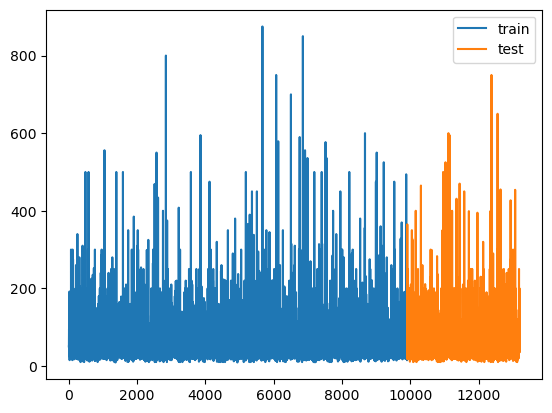

In [106]:
# Preparing the data
features = airbnb.columns.drop(['Price'])
X = airbnb[features].values
y = airbnb['Price'].values

print('Rows, columns:', X.shape)

# Step 1: Splitting the data
offset = 3301 
print('Offset:', offset)


X_train = X[:-offset, :]
y_train = y[:-offset]
X_test  = X[-offset:, :]
y_test  = y[-offset:]

print('Number of missing values in y_train:', np.isnan(y_train).sum())
print('Number of missing values in y_test:', np.isnan(y_test).sum())

plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y)),y_test,label='test')
plt.legend()
plt.show()



In [114]:
#drop missing values from test and train
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]
X_test = X_test[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]

#trying to figure out why y_train does not have any values
missing_values = np.isnan(y_train)
num_missing_values = np.sum(missing_values)
print('Number of missing values in y_train:', num_missing_values)

Number of missing values in y_train: 0


In [115]:
# Drop rows with missing values from the DataFrame
train_df.dropna(inplace=True)
print('Number of missing values in train_df:', train_df.isnull().sum().sum())

# Update X_train and y_train with the non-null values
X_train = train_df.values
y_train = y_train[train_df.index]

# Print the new shape of X_train and y_train after dropping missing values
print('New shape of X_train:', X_train.shape)
print('New shape of y_train:', y_train.shape)


Number of missing values in train_df: 0.0
New shape of X_train: (0, 74)
New shape of y_train: (0,)


In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_train = pd.DataFrame(X_train, columns=features)
#X_test = pd.DataFrame(X_test, columns=features)

# Calculate correlation matrix
matrix = X_train.corrwith(pd.Series(y_train), axis=1).round(2)
print(matrix)

# Convert correlation matrix to numeric format
matrix = pd.to_numeric(matrix, errors='coerce')

# Fill NaN or non-numeric values with 0
#matrix = matrix.fillna(0)

#matrix_df = pd.DataFrame(matrix, columns=["Correlation"])

# Convert correlation values to numeric data type
#matrix_df["Correlation"] = pd.to_numeric(matrix_df["Correlation"])

# Plot the correlation matrix using seaborn
#sns.heatmap(matrix_df, vmin=-1, vmax=1, cmap='vlag')
#plt.title("Correlation Matrix")
#plt.show()

Series([], dtype: float64)


In [112]:
isnull(y_train)

NameError: name 'isnull' is not defined

In [104]:
#filter dataframe to see strong correlations only
#unstack
matrix_df = matrix_df.unstack()
matrix_df[abs(matrix_df) >= 0.5]

Series([], dtype: float64)

In [105]:
#Drop NA and NaN values from train
import pandas as pd
import numpy as np

# Create a DataFrame from X_test
test_df = pd.DataFrame(X_test, columns=features)

# Drop rows with missing values from the DataFrame
test_df.dropna(inplace=True)

# Update X_train and y_train with the non-null values
X_test = train_df.values
y_test = y_train[train_df.index]

# Print the new shape of X_train after dropping missing values
print('New shape of X_test:', X_test.shape)


New shape of X_test: (0, 74)


In [92]:
#Normalizar the datasets
#Apply normaliazation to numerical values only
from sklearn.preprocessing import MinMaxScaler
num_features = X_train.select_dtypes(include='number').columns
scaler = MinMaxScaler()
#fit and transform
X_train_normalized = X_train.copy()
X_train_normalized[num_features] = scaler.fit_transform(X_train[num_features])
#transform the test set
X_test_normalized = X_test.copy()
X_test_normalized[num_features] = scaler.transform(X_test[num_features])

ValueError: at least one array or dtype is required

In [93]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
lasso = Lasso()
#establish parameters for grid search
param_grid ={'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train_normalized, y_train)
#find the most optimal parameters and model
best = grid_search.best_params_['alpha']
lasso_best = grid_search.best_estimator_
#fit the model on the training data with the best params
lasso_best.fit(X_train_normalized, y_train)
#make predictions on the teset set
y_pred = lasso_best.predict(X_test_normalized)
#calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=0.

In [66]:
print(X_train_normalized.shape)
print(y_train.shape)

(10565, 74)
(0,)
